In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5)
import scipy

In [37]:
N0 = 1e-3
K = 1

In [38]:
F = lambda N,r,K,nu: r*N*(1-(N/K)**nu)
maxN = lambda K,nu: K*(1+nu)**(-1./nu)
maxF = lambda r,K,nu: K*r*nu*(1+nu)**(-(1+nu)/nu)
N = np.linspace(0,K)

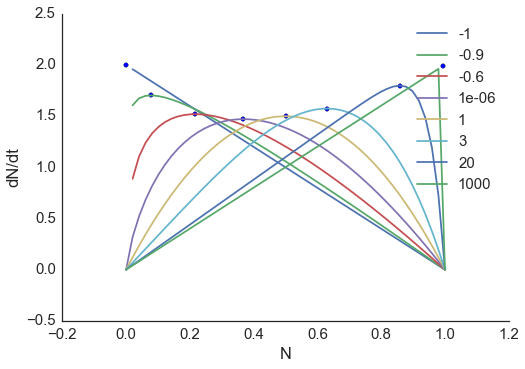

In [39]:
for nu in [-1,-0.9,-0.6,1e-6,1,3,20,1000]:
    r = (2*(nu+1)+2)/nu
    plt.plot(N, F(N,r,K,nu), label=str(nu))
    plt.scatter(maxN(K,nu), maxF(r,K,nu))
plt.xlabel('N')
plt.ylabel('dN/dt')
plt.legend()
sns.despine()

In [80]:
f = lambda t,N0,r,K,nu: K/(1 - (1 - (K/N0)**nu) * np.exp(-r*nu*t))**(1/nu)
t = np.linspace(0,14,10000)

K = 1
N0 = 0.01
nu = 0.5
r = 1#(2*(nu+1)+2)/nu

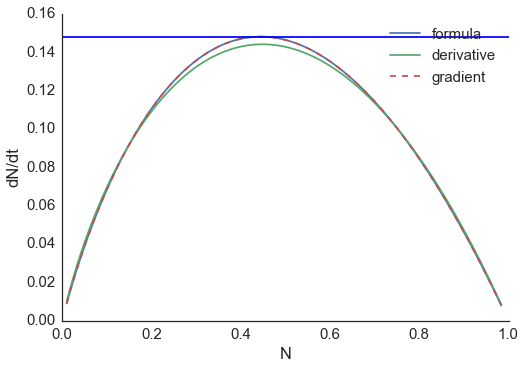

In [81]:
plt.plot(f(t,N0,r,K,nu), F(f(t,N0,r,K,nu),r,K,nu), label='formula')
plt.plot(f(t,N0,r,K,nu), scipy.misc.derivative(lambda t: f(t,N0,r,K,nu), t), label='derivative')
plt.plot(f(t,N0,r,K,nu), np.gradient(f(t,N0,r,K,nu), t[1]-t[0]), ls='--',  label='gradient')
plt.axhline(maxF(r,K,nu))
plt.legend(loc='upper right')
plt.xlabel('N')
plt.ylabel('dN/dt')
sns.despine()

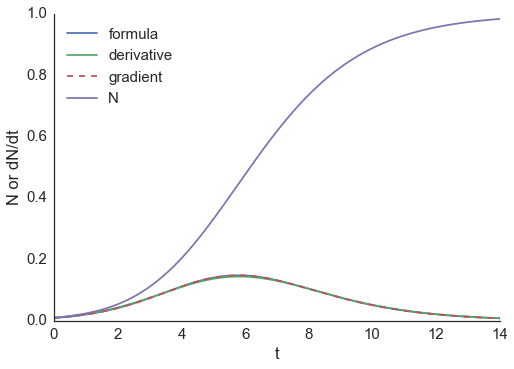

In [82]:
plt.plot(t, F(f(t,N0,r,K,nu),r,K,nu), label='formula')
plt.plot(t, scipy.misc.derivative(lambda t: f(t,N0,r,K,nu), t), label='derivative')
plt.plot(t, np.gradient(f(t,N0,r,K,nu), t[1]-t[0]), ls='--', label='gradient')
plt.plot(t, f(t,N0,r,K,nu), label='N')
plt.xlabel('t')
plt.ylabel('N or dN/dt')
plt.legend(loc='upper left')
sns.despine()

In [83]:
dNdt = np.gradient(f(t,N0,r,K,nu), t[1]-t[0])
print (round(dNdt.max(), 6))
print (maxF(r,K,nu))

0.148148
0.14814814814814814


In [84]:
i = dNdt.argmax()
tmax, Nmax = t[i], f(t[i],N0,r,K,nu)
print(Nmax, maxN(K, nu))

0.444508829928 0.4444444444444444


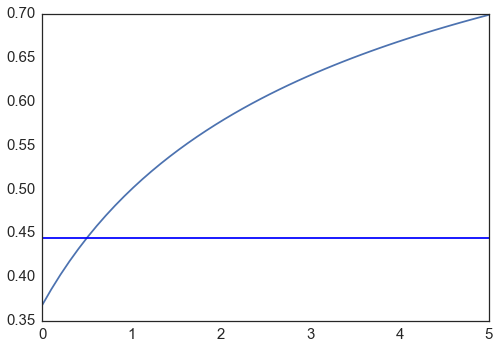

In [85]:
nus = np.linspace(1e-4,5)
plt.plot(nus, maxN(K,nus))
plt.axhline(Nmax/K)

In [100]:
def target(nu):
    return (1+nu)**(-1/nu) - Nmax/K
x = scipy.optimize.broyden1(target, 1, f_tol=1e-14).flatten()[0]
print(x)

0.50050217217


In [101]:
def find_nu(t, N):
    dNdt = np.gradient(N, t[1]-t[0])
    idx = np.isfinite(N)
    N = N[idx]
    t = t[idx]
    i = dNdt.argmax()
    Nmax = N[i] 
    K = N.max()
    def target(nu):
        return (1+nu)**(-1/nu) - Nmax/K
    return scipy.optimize.broyden1(target, 1, f_tol=1e-14).flatten()[0]

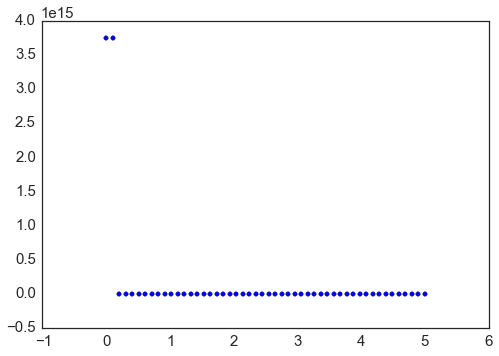

In [106]:
plt.scatter(nus, [find_nu(t, f(t,N0,r,K,nu)) for nu in nus])

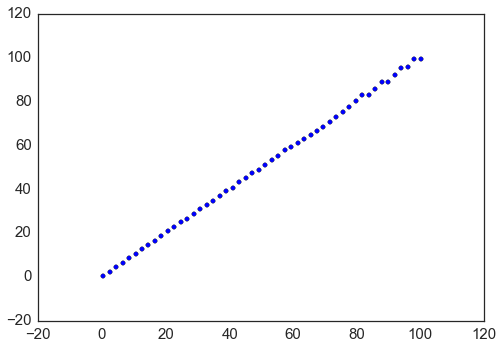

In [120]:
nus = np.linspace(0.4, 100)
plt.scatter(nus, [find_nu(t, f(t,N0,r,K,nu)) for nu in nus])

In [122]:
def find_r(t,N,nu):
    dNdt = np.gradient(N, t[1]-t[0])
    dNdtmax = dNdt.max()    
    K = N.max()
    return dNdtmax / (K * nu * (1 + nu)**(-(1 + nu) / nu))

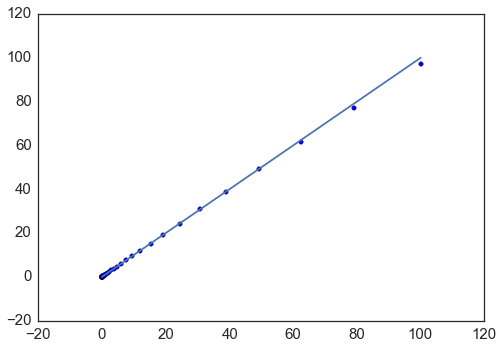

In [131]:
nu = 10
rs = np.logspace(-3,2)
plt.scatter(rs, [find_r(t, f(t,N0,r,K,nu), nu) for r in rs])
plt.plot(rs,rs)